## CD analysis
achen@2020-12-16

In [1]:
import pandas as pd
import os
import glob
from Bio import Seq
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import re
from scipy.stats import wilcoxon,mannwhitneyu
import numpy as np

In [12]:
meta1 = pd.read_csv('../CD/PRJNA400072_IBD_CD.txt',sep='\t')
meta1.head()

,study_accession,secondary_study_accession,sample_accession,secondary_sample_accession,experiment_accession,run_accession,submission_accession,tax_id,scientific_name,instrument_platform,...,sra_aspera,sra_galaxy,cram_index_ftp,cram_index_aspera,cram_index_galaxy,sample_alias,broker_name,sample_title,nominal_sdev,first_created
0,PRJNA400072,SRP129027,SAMN08049791,SRS2832056,SRX3558845,SRR6468499,SRA646300,408170,human gut metagenome,ILLUMINA,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR646/009/SRR646...,ftp.sra.ebi.ac.uk/vol1/srr/SRR646/009/SRR6468499,NaN,NaN,NaN,UMCGIBD00327,NaN,This sample has been submitted by pda|sayoldin...,NaN,2018-01-13
1,PRJNA400072,SRP129027,SAMN08049792,SRS2832054,SRX3558844,SRR6468500,SRA646300,408170,human gut metagenome,ILLUMINA,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR646/000/SRR646...,ftp.sra.ebi.ac.uk/vol1/srr/SRR646/000/SRR6468500,NaN,NaN,NaN,UMCGIBD00249,NaN,This sample has been submitted by pda|sayoldin...,NaN,2018-01-13
2,PRJNA400072,SRP129027,SAMN08049793,SRS2832051,SRX3558843,SRR6468501,SRA646300,408170,human gut metagenome,ILLUMINA,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR646/001/SRR646...,ftp.sra.ebi.ac.uk/vol1/srr/SRR646/001/SRR6468501,NaN,NaN,NaN,UMCGIBD00461,NaN,This sample has been submitted by pda|sayoldin...,NaN,2018-01-13
3,PRJNA400072,SRP129027,SAMN08049663,SRS2832049,SRX3558842,SRR6468502,SRA646300,408170,human gut metagenome,ILLUMINA,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR646/002/SRR646...,ftp.sra.ebi.ac.uk/vol1/srr/SRR646/002/SRR6468502,NaN,NaN,NaN,PRISM_7941,NaN,This sample has been submitted by pda|sayoldin...,NaN,2018-01-13
4,PRJNA400072,SRP129027,SAMN08049824,SRS2832053,SRX3558841,SRR6468503,SRA646300,408170,human gut metagenome,ILLUMINA,...,fasp.sra.ebi.ac.uk:/vol1/srr/SRR646/003/SRR646...,ftp.sra.ebi.ac.uk/vol1/srr/SRR646/003/SRR6468503,NaN,NaN,NaN,LLDeep_0012,NaN,This sample has been submitted by pda|sayoldin...,NaN,2018-01-13


In [127]:
meta1[['sample_accession','run_accession']].apply(lambda d:len(d),axis=0)

sample_accession    220
run_accession       220
dtype: int64

In [24]:
meta2 = pd.read_csv('../CD/PRJNA400072.meta.csv',sep='\t')
meta2 = meta2.rename({'Sample':'sample_alias'},axis=1)
smp2diag = dict(pd.merge(meta1,meta2,on='sample_alias').set_index('run_accession')['Diagnosis'])

In [6]:
merge_df = pd.DataFrame()
for f in glob.glob('../CD/stats/*.csv'):
    tmpdf = pd.read_csv(f)
    merge_df = pd.concat([merge_df,tmpdf])

In [25]:
merge_df['sample'] = merge_df['src'].str.split('-').str[0]
merge_df['diag'] = merge_df['sample'].map(smp2diag)

In [26]:
merge_df['sample']

0      SRR6468499
1      SRR6468499
2      SRR6468499
3      SRR6468499
4      SRR6468499
          ...    
131    SRR6468698
132    SRR6468698
133    SRR6468698
134    SRR6468698
135    SRR6468698
Name: sample, Length: 8024, dtype: object

<AxesSubplot:xlabel='diag', ylabel='sum-cov'>

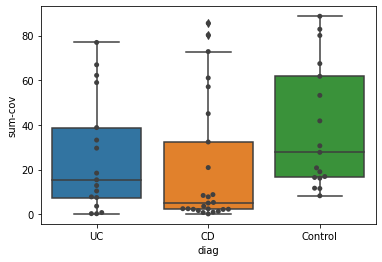

In [30]:
pltdf = merge_df[merge_df['src'].str.contains('GCA_902388275.1')]
sns.boxplot(data=pltdf,x='diag',y='sum-cov')
sns.swarmplot(data=pltdf,x='diag',y='sum-cov',color='0.25')

<AxesSubplot:xlabel='diag', ylabel='sum-cov'>

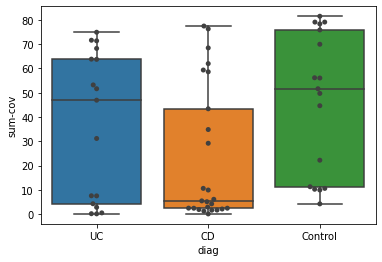

In [31]:
pltdf = merge_df[merge_df['src'].str.contains('GCA_000166035.1')]
sns.boxplot(data=pltdf,x='diag',y='sum-cov')
sns.swarmplot(data=pltdf,x='diag',y='sum-cov',color='0.25')

<AxesSubplot:xlabel='diag', ylabel='sum-cov'>

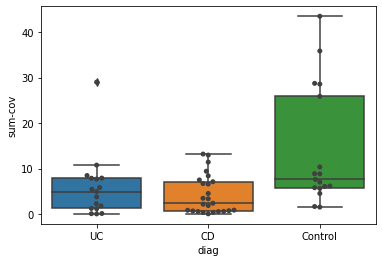

In [34]:
pltdf = merge_df[merge_df['src'].str.contains('GCA_001406615.2')]
sns.boxplot(data=pltdf,x='diag',y='sum-cov')
sns.swarmplot(data=pltdf,x='diag',y='sum-cov',color='0.25')

<AxesSubplot:xlabel='diag', ylabel='sum-cov'>

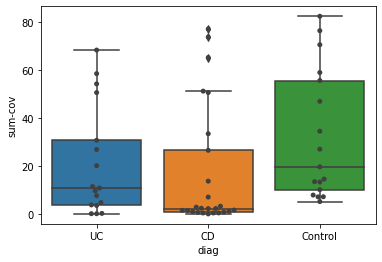

In [35]:
pltdf = merge_df[merge_df['src'].str.contains('GCA_001916535')]
sns.boxplot(data=pltdf,x='diag',y='sum-cov')
sns.swarmplot(data=pltdf,x='diag',y='sum-cov',color='0.25')

In [36]:
clust_df = pd.read_csv('../functional_analysis/clusters/backup/f.all.txt')

In [39]:
genome2clust_dict = dict(clust_df.set_index('genome')['clust'])

In [46]:
merge_df['genome'] = merge_df['src'].apply(lambda d: '_'.join(d.split('-')[1].split('_')[:2]))
merge_df['clust'] = merge_df['genome'].map(genome2clust_dict)

In [54]:
merge_df

,src,total,consist,best,falsepositive,equal,sum-cov,mean_dep,nm-total,nm-best,nm-consist,sample,diag,genome,clust
0,SRR6468499-GCA_014869065.1_ASM1486906v1_genomic,277724,6020,129150,124092,146905,79.781520,6.265075,5-0-1.5014078725641284-1.0-1.4513623350174358,5-0-0.48346109175377466-0.0-0.8299474671534959,5-0-0.5475083056478405-0.0-0.8949296659927379,SRR6468499,UC,GCA_014869065.1,4
1,SRR6468499-GCA_902388275.1_UHGG_MGYG-HGUT-0254...,382039,2,171534,175083,205595,76.954500,6.012560,5-0-1.5974102120464142-1.0-1.5230568336530026,5-0-0.48717455431576245-0.0-0.8741153141322617,5-4-4.5-4.5-0.5,SRR6468499,UC,GCA_902388275.1,4
2,SRR6468499-GCA_003293635.1_ASM329363v1_genomic,382039,10,171534,175082,205588,76.953500,6.012560,5-0-1.5974102120464142-1.0-1.5230568336530026,5-0-0.4871570650716476-0.0-0.8740550314569895,5-1-2.6-3.0-1.2,SRR6468499,UC,GCA_003293635.1,4
3,SRR6468499-GCA_003287505.1_ASM328750v1_genomic,381040,11,170728,175020,204670,76.916285,6.186633,5-0-1.5980894394289313-1.0-1.5229056350794936,5-0-0.4851342486293988-0.0-0.8701893224647259,5-0-1.9090909090909092-2.0-1.6211413181933645,SRR6468499,UC,GCA_003287505.1,4
4,SRR6468499-GCA_014868995.1_ASM1486899v1_genomic,219636,6669,105537,95185,117262,76.586222,6.183722,5-0-1.4594328798557614-1.0-1.4234162689074124,5-0-0.5034158636307645-0.0-0.8452744723226729,5-0-0.7438896386264807-0.0-1.0454195376559139,SRR6468499,UC,GCA_014868995.1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,SRR6468698-GCA_004551805.1_ASM455180v1_genomic,42975,11,3274,38620,4217,4.038129,0.787038,5-0-3.3516695753344967-4.0-1.4733326045181503,5-0-0.8362858888210141-0.0-1.3589506485231841,3-1-1.6363636363636365-1.0-0.7713892158398701,SRR6468698,UC,GCA_004551805.1,5
132,SRR6468698-GCA_004554025.1_ASM455402v1_genomic,33068,125,2037,30402,2429,3.975868,0.898976,5-0-3.625378008951252-4.0-1.3386710285289365,5-0-1.2817869415807561-1.0-1.5254757413262552,5-0-1.376-1.0-1.17073652031531,SRR6468698,UC,GCA_004554025.1,5
133,SRR6468698-GCA_004552345.1_ASM455234v1_genomic,46475,37,3819,41189,5082,3.827067,0.568655,5-0-3.364927380311996-4.0-1.4851231540799827,5-0-0.7583136946844724-0.0-1.3034009474837296,4-0-1.4054054054054055-1.0-1.2403020438468937,SRR6468698,UC,GCA_004552345.1,5
134,SRR6468698-GCA_002313795.1_ASM231379v1_genomic,32891,14,1771,30596,2207,1.903070,0.369177,5-0-3.594691556960871-4.0-1.3862890188559511,5-0-0.7684923771880293-0.0-1.382123889277564,5-0-2.2857142857142856-2.5-1.7083229633001997,SRR6468698,UC,GCA_002313795.1,4


In [55]:
for name,grp in merge_df.groupby('sample'):
    break

In [56]:
grp

,src,total,consist,best,falsepositive,equal,sum-cov,mean_dep,nm-total,nm-best,nm-consist,sample,diag,genome,clust
0,SRR6468499-GCA_014869065.1_ASM1486906v1_genomic,277724,6020,129150,124092,146905,79.781520,6.265075,5-0-1.5014078725641284-1.0-1.4513623350174358,5-0-0.48346109175377466-0.0-0.8299474671534959,5-0-0.5475083056478405-0.0-0.8949296659927379,SRR6468499,UC,GCA_014869065.1,4
1,SRR6468499-GCA_902388275.1_UHGG_MGYG-HGUT-0254...,382039,2,171534,175083,205595,76.954500,6.012560,5-0-1.5974102120464142-1.0-1.5230568336530026,5-0-0.48717455431576245-0.0-0.8741153141322617,5-4-4.5-4.5-0.5,SRR6468499,UC,GCA_902388275.1,4
2,SRR6468499-GCA_003293635.1_ASM329363v1_genomic,382039,10,171534,175082,205588,76.953500,6.012560,5-0-1.5974102120464142-1.0-1.5230568336530026,5-0-0.4871570650716476-0.0-0.8740550314569895,5-1-2.6-3.0-1.2,SRR6468499,UC,GCA_003293635.1,4
3,SRR6468499-GCA_003287505.1_ASM328750v1_genomic,381040,11,170728,175020,204670,76.916285,6.186633,5-0-1.5980894394289313-1.0-1.5229056350794936,5-0-0.4851342486293988-0.0-0.8701893224647259,5-0-1.9090909090909092-2.0-1.6211413181933645,SRR6468499,UC,GCA_003287505.1,4
4,SRR6468499-GCA_014868995.1_ASM1486899v1_genomic,219636,6669,105537,95185,117262,76.586222,6.183722,5-0-1.4594328798557614-1.0-1.4234162689074124,5-0-0.5034158636307645-0.0-0.8452744723226729,5-0-0.7438896386264807-0.0-1.0454195376559139,SRR6468499,UC,GCA_014868995.1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,SRR6468499-GCA_014869135.1_ASM1486913v1_genomic,43992,27,6161,35935,7608,6.499885,1.018913,5-0-3.1260911074740863-3.0-1.6254000069094947,5-0-0.9456257101119948-0.0-1.5223692981562518,4-0-1.7037037037037037-1.0-1.5826563421645554,SRR6468499,UC,GCA_014869135.1,5
132,SRR6468499-GCA_001406615.2_14207_7_53-2_genomic,30560,754,10302,16964,12653,5.845458,2.721846,5-0-2.062303664921466-2.0-1.7476552525053688,5-0-0.45855173752669387-0.0-1.083031330092146,5-0-1.7228116710875332-1.0-1.701562567591557,SRR6468499,UC,GCA_001406615.2,5
133,SRR6468499-GCA_004554025.1_ASM455402v1_genomic,31118,27,2499,27636,3040,5.165256,0.357359,5-0-3.6695803072176876-4.0-1.3392220882843064,5-0-2.0244097639055623-2.0-1.8294105878671152,5-0-2.6296296296296298-3.0-1.2808604789474505,SRR6468499,UC,GCA_004554025.1,5
134,SRR6468499-GCA_002313795.1_ASM231379v1_genomic,24231,28,1778,21931,2048,2.021144,0.321131,5-0-3.619702034583798-4.0-1.4244565858915281,5-0-1.312710911136108-0.0-1.7731487967624853,5-0-2.3214285714285716-3.0-1.5365446260213538,SRR6468499,UC,GCA_002313795.1,4


<AxesSubplot:xlabel='clust', ylabel='sum-cov'>

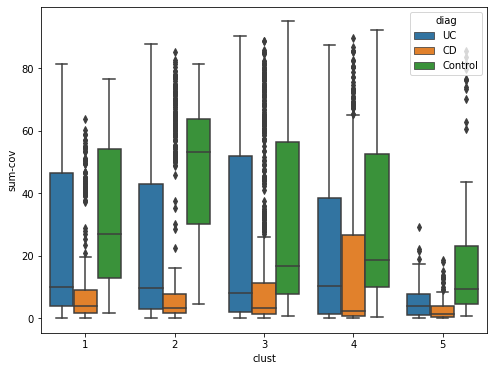

In [59]:
plt.figure(figsize=(8,6))
sns.boxplot(data=merge_df,x='clust',y='sum-cov',hue='diag')
#sns.swarmplot(data=merge_df,x='clust',y='sum-cov',hue='diag',color='0.25')

In [80]:
#merge_df[merge_df['clust']==4]
res_cov = []
for name,grp in merge_df.groupby(['clust','sample']):
    clst,smp=  name
    diag = grp['diag'].iloc[0]
    res_cov.append([grp['sum-cov'].mean(),clst,smp,diag])

6.616071638030914e-06
2.065914502499772e-05
0.001146642301473306
0.002225021014322735
2.87193374432078e-06


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

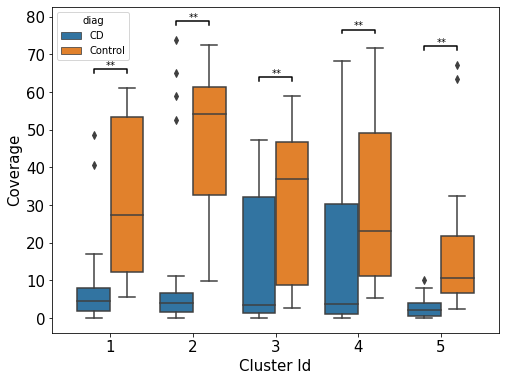

In [136]:
pltdf=  pd.DataFrame(res_cov)
pltdf.columns = ['cov','clust','smp','diag']
pltdf = pltdf[pltdf['diag']!='UC']
plt.figure(figsize=(8,6))
sns.boxplot(data=pltdf,x='clust',y='cov',hue='diag')
#sns.swarmplot(data=pltdf,x='clust',y='cov',hue='diag')

for i in range(1,6):
    y = pltdf[pltdf['clust']==i ]['cov'].max()+5
    tmpdf = pltdf[pltdf['clust']==i]
    a = tmpdf[tmpdf['diag']=='CD']['cov']
    b = tmpdf[tmpdf['diag']=='Control']['cov']
    s,p = mannwhitneyu(a,b)   
    print(p)
    plt.plot([i-1-0.2, i-1-0.2, i-1+0.2, i-1+0.2], [y-1,y,y,y-1], lw=1.5, c='k')
    plt.text(i-1-0.05,y+1,  "**", va='center', color='k')
plt.xlabel('Cluster Id',fontsize=15)
plt.ylabel('Coverage',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

6.616071638030914e-06
2.065914502499772e-05
0.001146642301473306
0.002225021014322735
2.87193374432078e-06


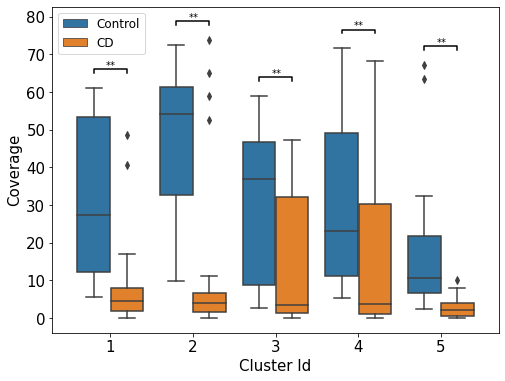

In [139]:
pltdf=  pd.DataFrame(res_cov)
pltdf.columns = ['cov','clust','smp','type']
pltdf = pltdf.sort_values(by='type',ascending=False)
pltdf = pltdf[pltdf['type']!='UC']
plt.figure(figsize=(8,6))
sns.boxplot(data=pltdf,x='clust',y='cov',hue='type')
#sns.swarmplot(data=pltdf,x='clust',y='cov',hue='type')

for i in range(1,6):
    y = pltdf[pltdf['clust']==i ]['cov'].max()+5
    tmpdf = pltdf[pltdf['clust']==i]
    a = tmpdf[tmpdf['type']=='CD']['cov']
    b = tmpdf[tmpdf['type']=='Control']['cov']
    s,p = mannwhitneyu(a,b)   
    print(p)
    plt.plot([i-1-0.2, i-1-0.2, i-1+0.2, i-1+0.2], [y-1,y,y,y-1], lw=1.5, c='k')
    plt.text(i-1-0.05,y+1,  "**", va='center', color='k')
plt.xlabel('Cluster Id',fontsize=15)
plt.ylabel('Coverage',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)

MannwhitneyuResult(statistic=51.0, pvalue=0.000679433415301793)